<summary>Table of Contents</summary>

- [1. Comparison of models](#1-comparison-of-models)
- [2. Self-supervised](#2-self-supervised)
- [3. Ablation study](#3-ablation-study)
- [3. Decomposition](#4-decomposition)

This script summarizes results from all experiments and represents them in plots.

In [2]:
# <details>
import pandas as pd
from utils.plot_final_results import plot_results_models_multiple_countries

# 1. Comparison of models

In [3]:
countries = ['DE', 'ES', 'FR', 'GB', 'IT']
naive_df = pd.read_csv('results/naive/metrics_persistence_countries_minmax.csv', header=[0, 1], index_col=[0, 1]).loc[:, ('Persistence', ['RMSE', 'MAE'])]
arima_df = pd.read_csv('results/arima/metrics_arima_countries_minmax.csv', header=[0, 1], index_col=[0, 1]).loc[:, ('(S)ARIMA', ['RMSE', 'MAE'])]
informer_df = pd.read_csv('results/informer/informer.csv', header=[0, 1], index_col=[0, 1]).loc[:, ('Informer', ['RMSE', 'MAE'])]
patchtst_df = pd.read_csv('results/patchtst/patchtst_128.csv', header=[0, 1], index_col=[0, 1]).loc[:, ('PatchTST/42', ['RMSE', 'MAE'])]
patchtst_64_df = pd.read_csv('results/patchtst/patchtst_bs128_pl512.csv', header=[0, 1], index_col=[0, 1]).loc[:, ('PatchTST/64', ['RMSE', 'MAE'])]

all_df = pd.concat([naive_df, arima_df, informer_df, patchtst_df], axis=1).round(4)
all_df


Model            Persistence         (S)ARIMA         Informer          \
Metrics                 RMSE     MAE     RMSE     MAE     RMSE     MAE   
Country Pred_len                                                         
DE      24            0.1961  0.1387   0.1115  0.0932   0.1622  0.1042   
        96            0.2614  0.1969   0.2028  0.1649   0.2074  0.1434   
        168           0.2339  0.1701   0.2279  0.1851   0.2311  0.1585   
ES      24            0.1406  0.0943   0.0968  0.0789   0.1523  0.0922   
        96            0.1967  0.1392   0.1417  0.1122   0.2293  0.1431   
        168           0.1774  0.1238   0.1761  0.1359   0.2281  0.1467   
FR      24            0.1224  0.0800   0.0760  0.0606   0.1117  0.0636   
        96            0.1782  0.1250   0.1254  0.0981   0.1499  0.0897   
        168           0.1629  0.1081   0.1489  0.1150   0.1559  0.0971   
GB      24            0.1989  0.1445   0.1441  0.1201   0.1802  0.1202   
        96            0.2554  0.1942   0.2153  0.1769   0.2249  0.1575   
        168           0.2469  0.1856   0.2267  0.1828   0.2454  0.1703   
IT      24            0.1440  0.0966   0.0864  0.0698   0.1120  0.0657   
        96            0.1971  0.1410   0.1312  0.1033   0.1441  0.0887   
        168           0.1569  0.1092   0.1657  0.1276   0.1486  0.0967   

Model            PatchTST/42          
Metrics                 RMSE     MAE  
Country Pred_len                      
DE      24            0.1447  0.0877  
        96            0.1940  0.1282  
        168           0.1983  0.1340  
ES      24            0.0989  0.0593  
        96            0.1365  0.0865  
        168           0.1445  0.0922  
FR      24            0.0998  0.0548  
        96            0.1384  0.0804  
        168           0.1465  0.0872  
GB      24            0.1577  0.0995  
        96            0.2041  0.1395  
        168           0.2115  0.1468  
IT      24            0.1004  0.0567  
        96            0.1372  0.0808  
        168           0.1447  0.0870

Create plots.

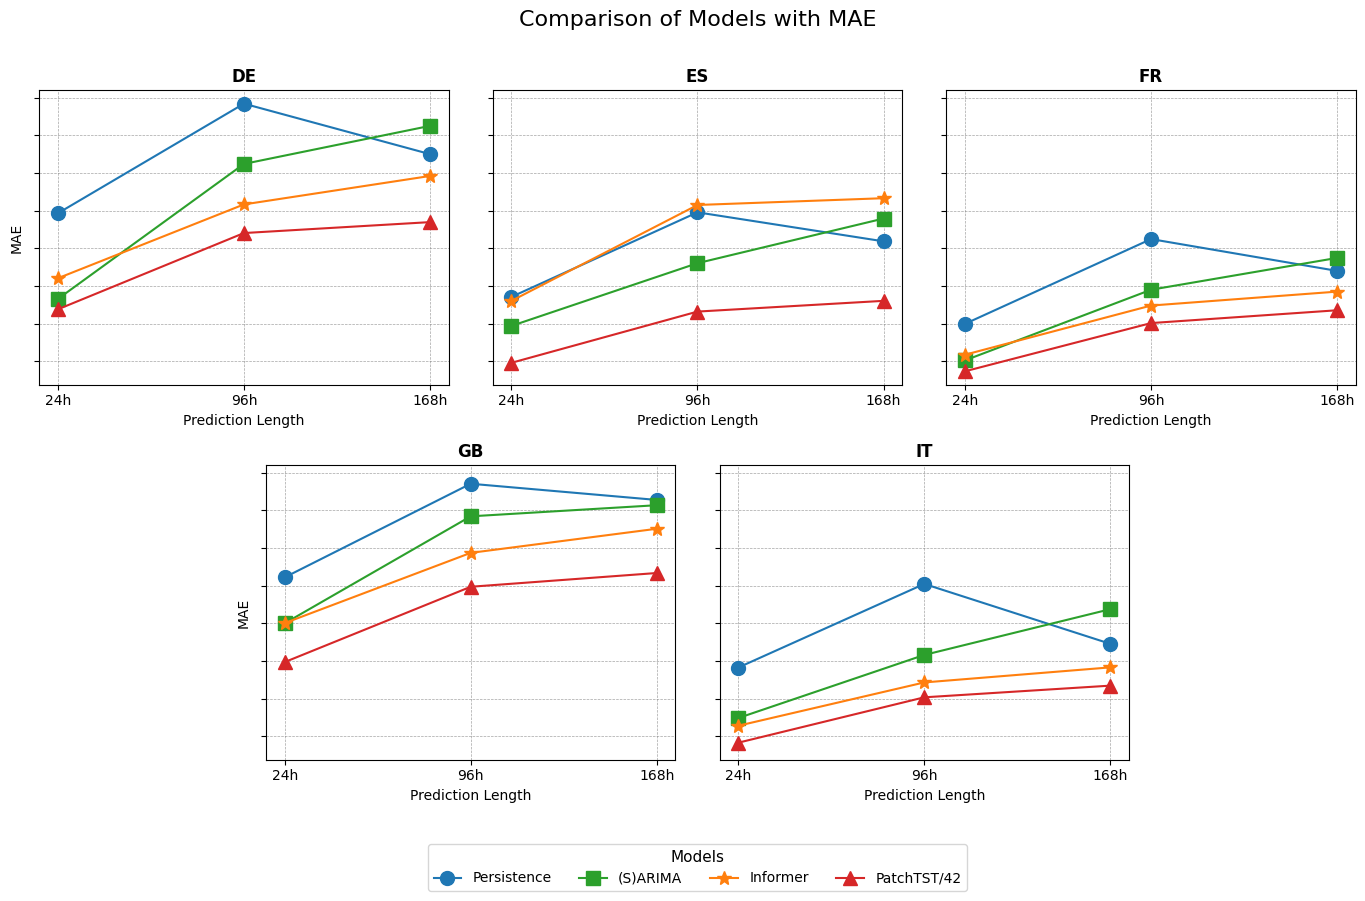

In [4]:
plot_results_models_multiple_countries(all_df, 
                                       function="lines", 
                                       countries=countries, 
                                       eval_metric='MAE')

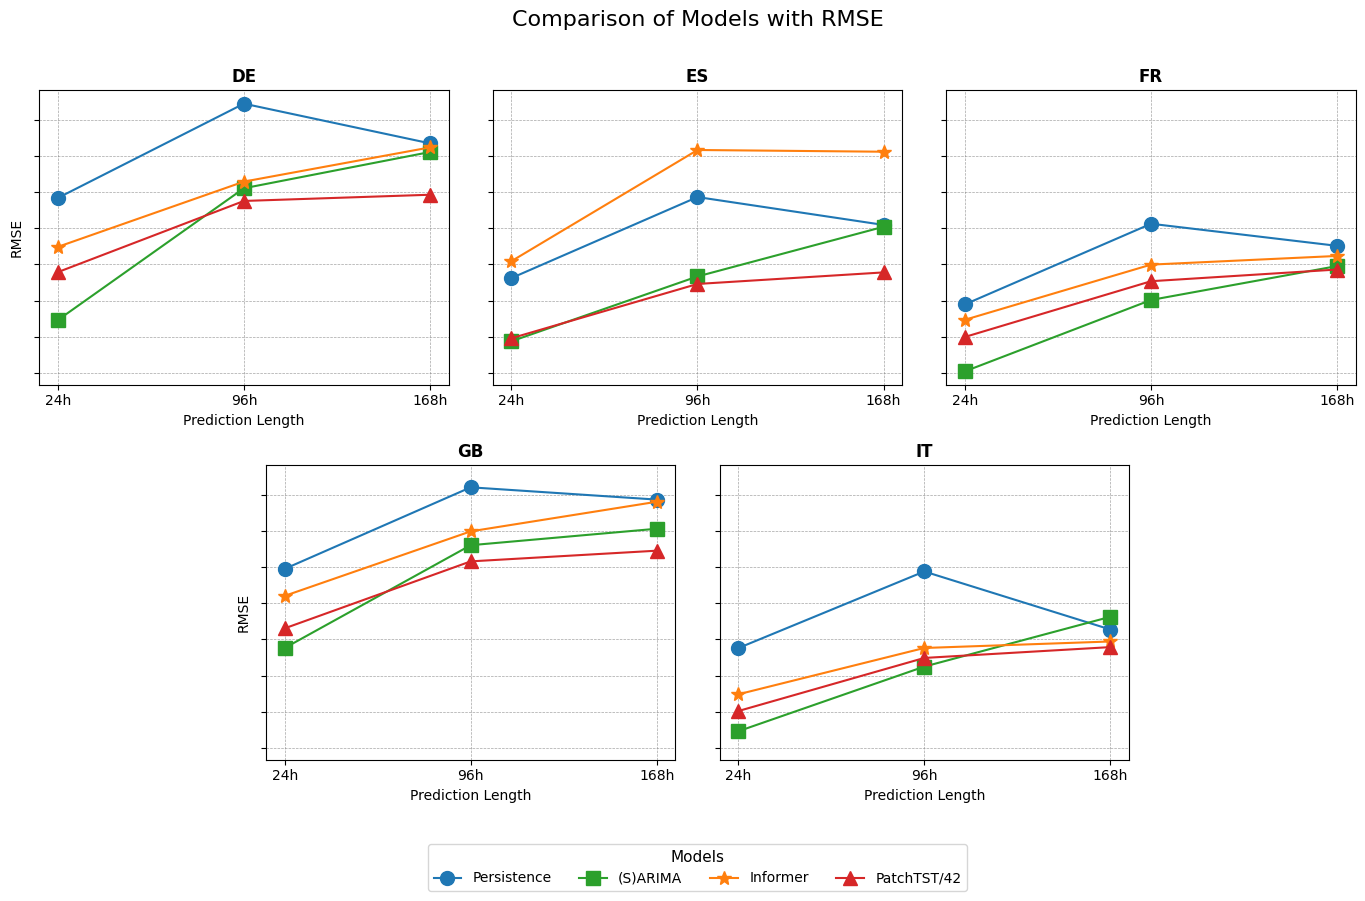

In [5]:
plot_results_models_multiple_countries(all_df, 
                                       function="lines", 
                                       countries=countries, 
                                       eval_metric='RMSE')

# 2. Self-supervised

In [ ]:
self_supervised = pd.read_csv('results/patchtst/finetune_results.csv', header=[0, 1], index_col=[0, 1]).loc[:, ('Self-supervised', ['RMSE', 'MAE'])]
all_df_2 = pd.concat([patchtst_df, patchtst_64_df, self_supervised], axis=1).round(4)
all_df_2.round(4)

Model            PatchTST/42         PatchTST/64         Self-supervised  \
Metrics                 RMSE     MAE        RMSE     MAE            RMSE   
Country Pred_len                                                           
DE      24            0.1447  0.0877      0.1449  0.0880          0.1449   
        96            0.1940  0.1282      0.1895  0.1251          0.1872   
        168           0.1983  0.1340      0.1964  0.1327          0.1947   
ES      24            0.0989  0.0593      0.0993  0.0598          0.0976   
        96            0.1365  0.0865      0.1376  0.0878          0.1369   
        168           0.1445  0.0922      0.1460  0.0946          0.1456   
FR      24            0.0998  0.0548      0.1002  0.0553          0.1001   
        96            0.1384  0.0804      0.1404  0.0808          0.1425   
        168           0.1465  0.0872      0.1487  0.0882          0.1494   
GB      24            0.1577  0.0995      0.1567  0.0989          0.1558   
        96            0.2041  0.1395      0.2026  0.1388          0.2026   
        168           0.2115  0.1468      0.2084  0.1449          0.2071   
IT      24            0.1004  0.0567      0.1005  0.0573          0.1007   
        96            0.1372  0.0808      0.1378  0.0826          0.1373   
        168           0.1447  0.0870      0.1428  0.0880          0.1418   

Model                     
Metrics              MAE  
Country Pred_len          
DE      24        0.0884  
        96        0.1253  
        168       0.1313  
ES      24        0.0593  
        96        0.0880  
        168       0.0947  
FR      24        0.0551  
        96        0.0818  
        168       0.0874  
GB      24        0.0994  
        96        0.1390  
        168       0.1443  
IT      24        0.0579  
        96        0.0820  
        168       0.0880

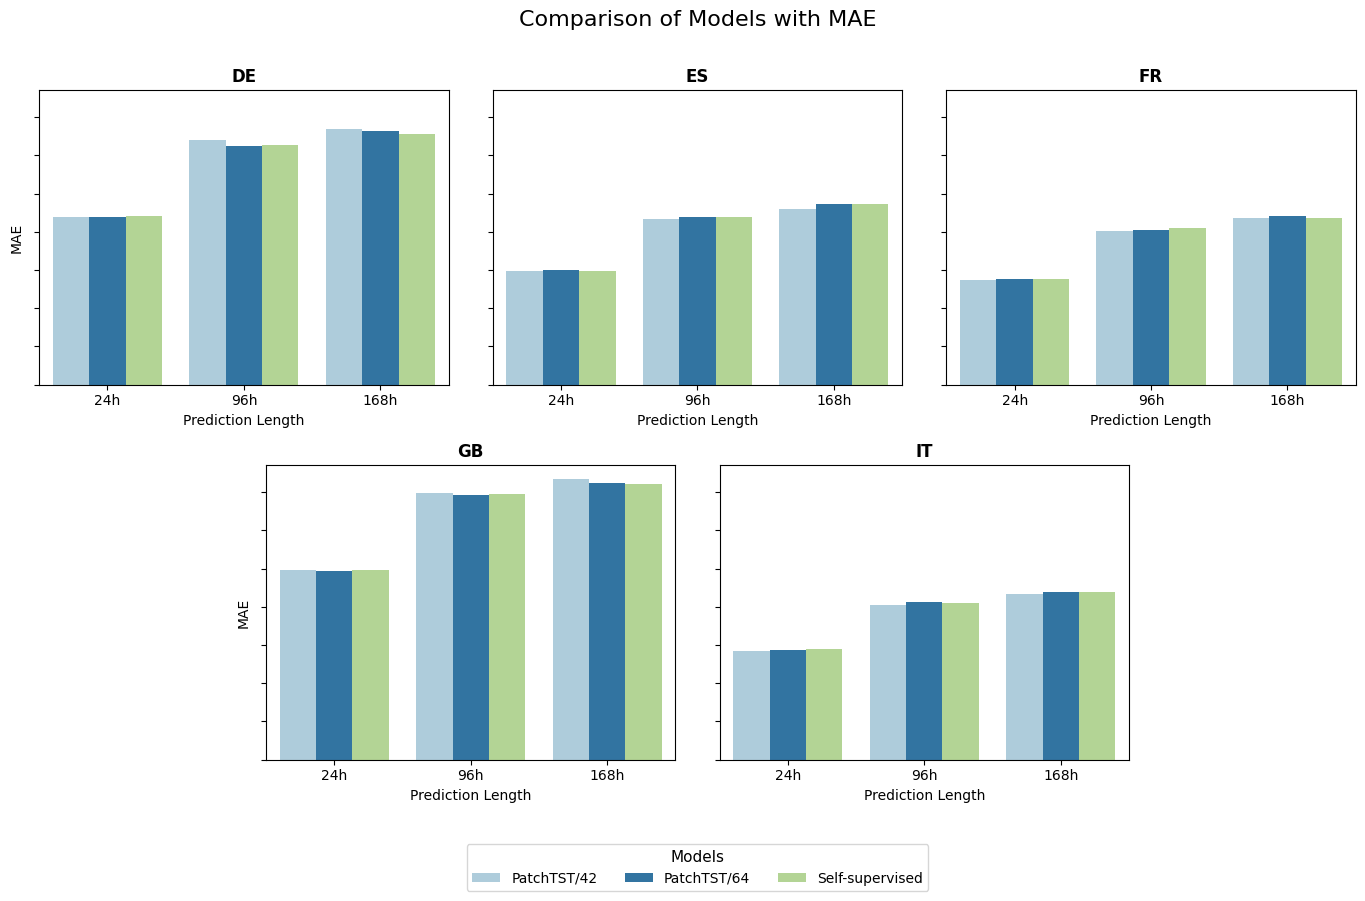

In [18]:
plot_results_models_multiple_countries(all_df_2, 
                                       function="bars", 
                                       countries=countries, 
                                       eval_metric='MAE',
                                       palette="Paired") 
# whether my eyes do not work anymore, or all these palettes are terrible

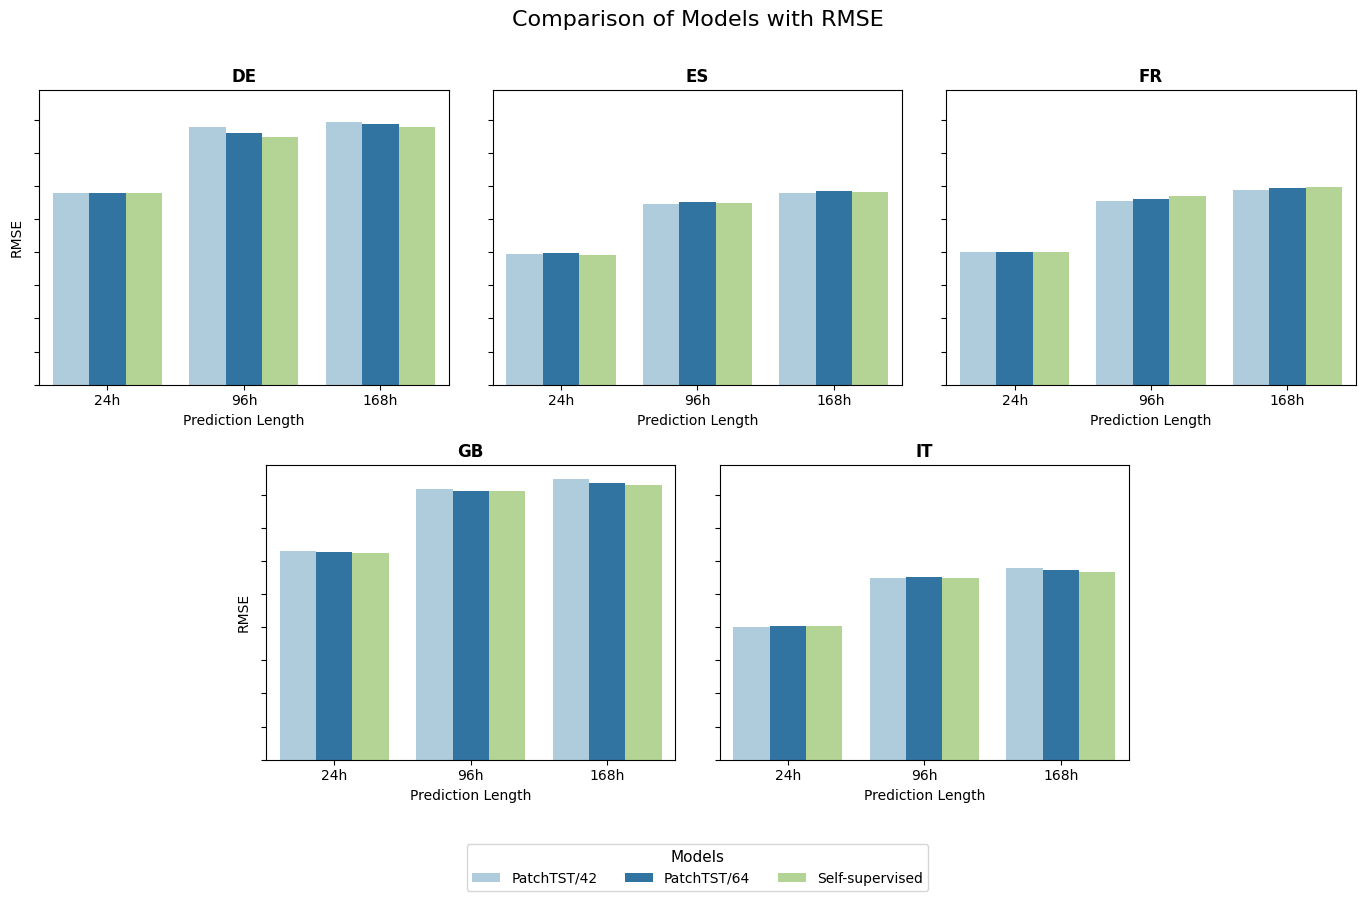

In [26]:
plot_results_models_multiple_countries(all_df_2, 
                                       function="bars", 
                                       countries=countries, 
                                       eval_metric='RMSE',
                                       palette="Paired")

# 3. Ablation study

In [21]:
channel_mix = pd.read_csv('results/patchtst/patchtst_channel_mixing.csv', header=[0, 1], index_col=[0, 1]).loc[:, ('CM', ['RMSE', 'MAE'])]
patchtst_mix_features = pd.read_csv('results/patchtst/patchtst_channel_mixing_MIX_FEATURES.csv', header=[0, 1], index_col=[0, 1]).loc[:, ('CM', ['RMSE', 'MAE'])]

all_df_3 = pd.concat([channel_mix,patchtst_mix_features], axis=1).round(4)
all_df_3.round(4)


Model                 CM                        
Metrics             RMSE     MAE    RMSE     MAE
Country Pred_len                                
DE      24        0.1466  0.0920  0.1633  0.1058
        96        0.2045  0.1345  0.2054  0.1412
        168       0.2148  0.1428  0.2079  0.1427
ES      24        0.0997  0.0613  0.1072  0.0680
        96        0.1385  0.0908  0.1463  0.0967
        168       0.1477  0.0978  0.1577  0.1058
FR      24        0.1015  0.0569  0.1093  0.0624
        96        0.1445  0.0840  0.1513  0.0888
        168       0.1460  0.0886  0.1508  0.0918
GB      24        0.1586  0.1015  0.1692  0.1115
        96        0.2069  0.1411  0.2114  0.1466
        168       0.2237  0.1511  0.2173  0.1520
IT      24        0.1017  0.0585  0.1059  0.0630
        96        0.1351  0.0821  0.1406  0.0871
        168       0.1413  0.0880  0.1445  0.0912

In [22]:
no_revin = pd.read_csv('results/patchtst/patchtst_no_revin.csv', header=[0, 1], index_col=[0, 1]).loc[:, ('-RevIN', ['RMSE', 'MAE'])]
channel_mix = pd.read_csv('results/patchtst/patchtst_channel_mixing.csv', header=[0, 1], index_col=[0, 1]).loc[:, ('CM', ['RMSE', 'MAE'])]
patchtst_mix_features = pd.read_csv('results/patchtst/patchtst_channel_mixing_MIX_FEATURES.csv', header=[0, 1], index_col=[0, 1]).loc[:, ('CM', ['RMSE', 'MAE'])]
no_patch = pd.read_csv('results/patchtst/patchtst_no_patching.csv', header=[0, 1], index_col=[0, 1]).loc[:, ('-P', ['RMSE', 'MAE'])]
all_df_3 = pd.concat([patchtst_df, no_revin, patchtst_mix_features, no_patch], axis=1).round(4)
all_df_3.round(4)

Model            PatchTST/42          -RevIN              CM              -P  \
Metrics                 RMSE     MAE    RMSE     MAE    RMSE     MAE    RMSE   
Country Pred_len                                                               
DE      24            0.1447  0.0877  0.1477  0.0918  0.1633  0.1058  0.1472   
        96            0.1940  0.1282  0.2013  0.1327  0.2054  0.1412  0.1949   
        168           0.1983  0.1340  0.2092  0.1401  0.2079  0.1427  0.2004   
ES      24            0.0989  0.0593  0.1130  0.0731  0.1072  0.0680  0.1034   
        96            0.1365  0.0865  0.1579  0.1055  0.1463  0.0967  0.1390   
        168           0.1445  0.0922  0.1764  0.1167  0.1577  0.1058  0.1472   
FR      24            0.0998  0.0548  0.1036  0.0600  0.1093  0.0624  0.1040   
        96            0.1384  0.0804  0.1399  0.0823  0.1513  0.0888  0.1432   
        168           0.1465  0.0872  0.1558  0.0904  0.1508  0.0918  0.1471   
GB      24            0.1577  0.0995  0.1616  0.1044  0.1692  0.1115  0.1626   
        96            0.2041  0.1395  0.2144  0.1477  0.2114  0.1466  0.2052   
        168           0.2115  0.1468  0.2222  0.1537  0.2173  0.1520  0.2106   
IT      24            0.1004  0.0567  0.1035  0.0611  0.1059  0.0630  0.1044   
        96            0.1372  0.0808  0.1369  0.0835  0.1406  0.0871  0.1387   
        168           0.1447  0.0870  0.1423  0.0877  0.1445  0.0912  0.1422   

Model                     
Metrics              MAE  
Country Pred_len          
DE      24        0.0909  
        96        0.1290  
        168       0.1349  
ES      24        0.0632  
        96        0.0894  
        168       0.0960  
FR      24        0.0585  
        96        0.0837  
        168       0.0878  
GB      24        0.1037  
        96        0.1391  
        168       0.1445  
IT      24        0.0594  
        96        0.0825  
        168       0.0865

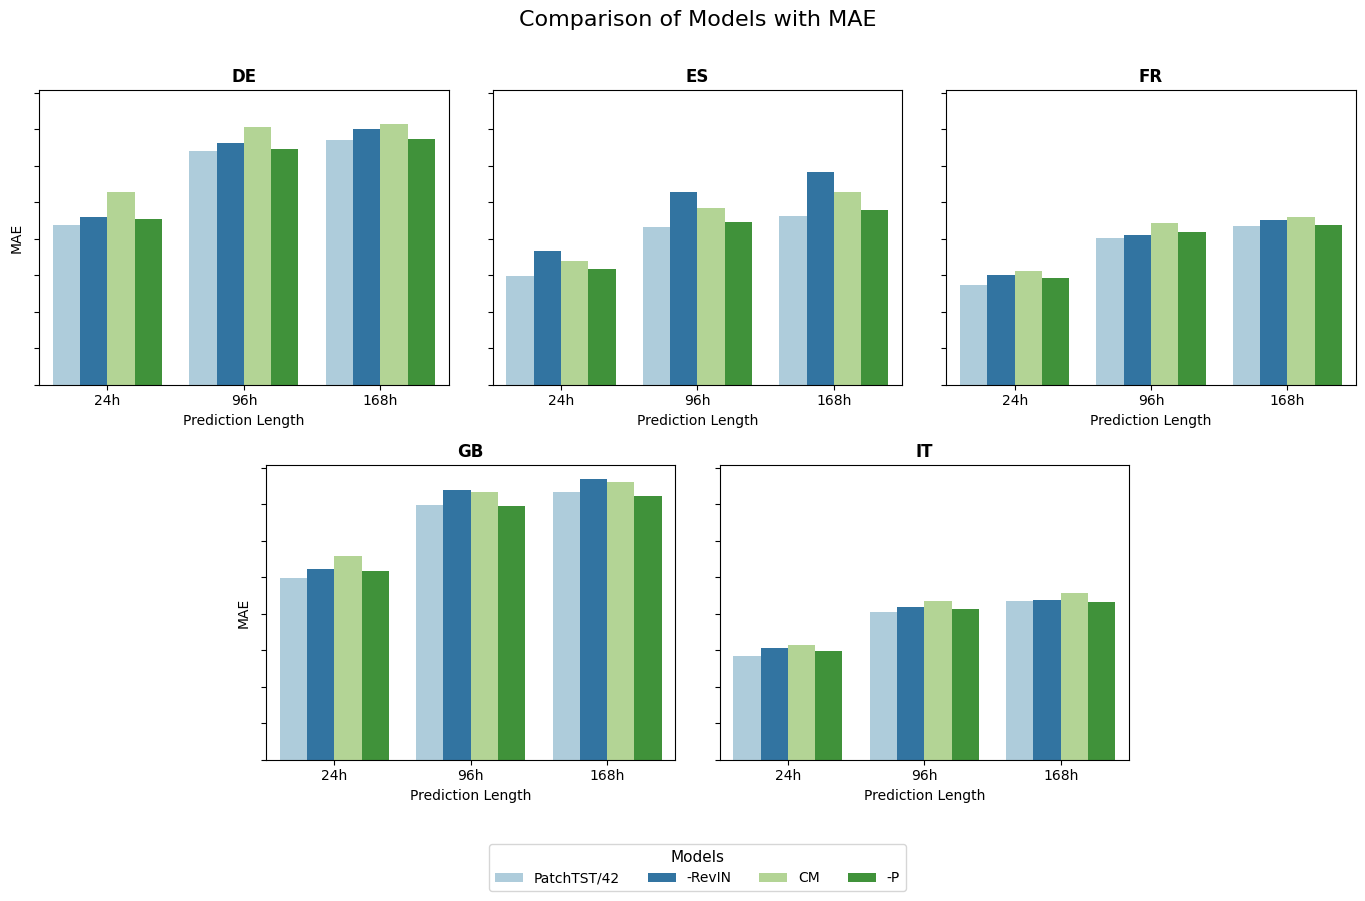

In [23]:
plot_results_models_multiple_countries(all_df_3, 
                                       function="bars", 
                                       countries=countries, 
                                       eval_metric='MAE',
                                       palette="Paired")

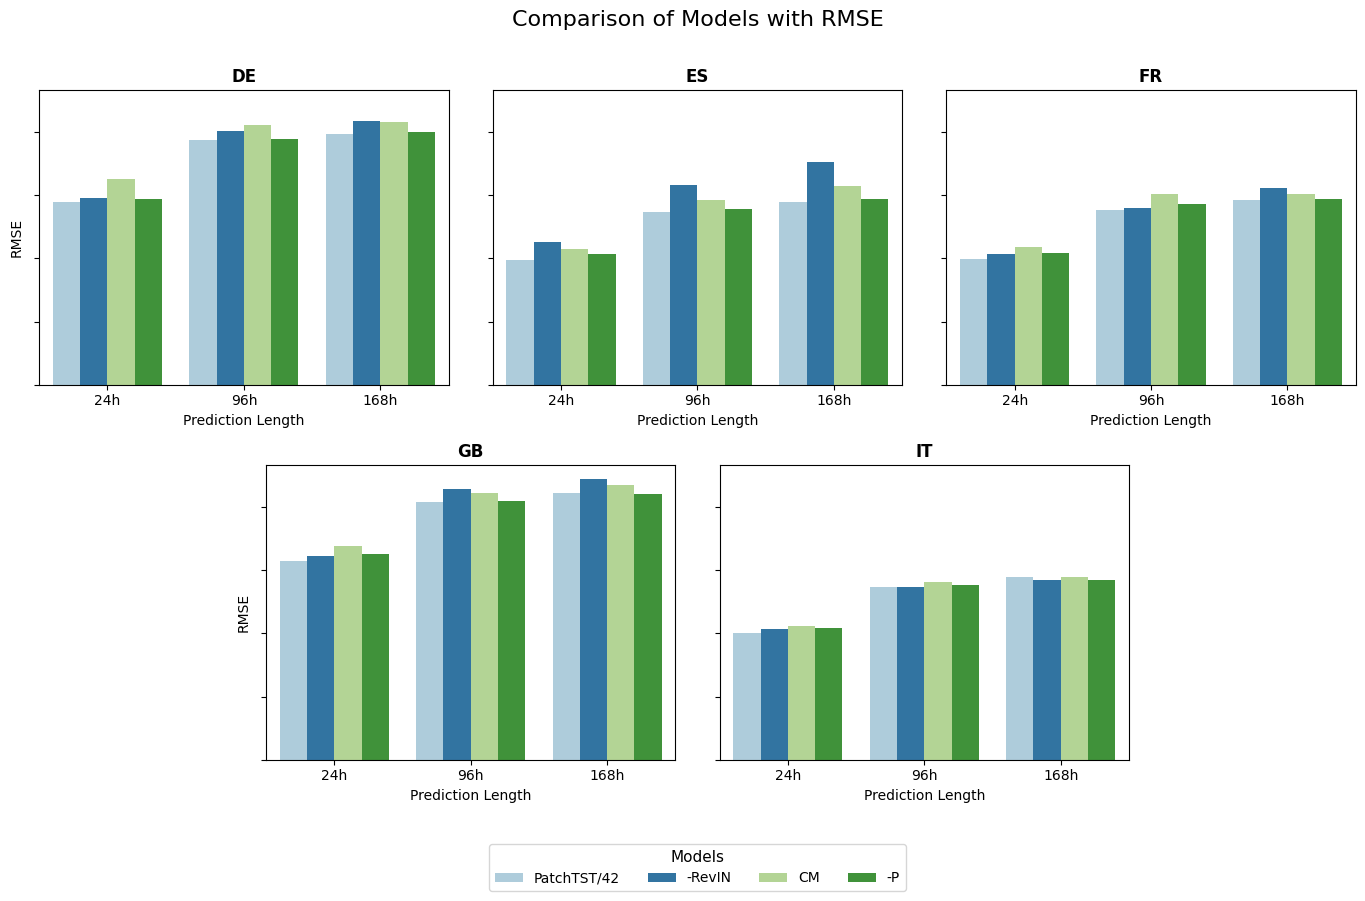

In [24]:
plot_results_models_multiple_countries(all_df_3, 
                                       function="bars", 
                                       countries=countries, 
                                       eval_metric='RMSE',
                                       palette="Paired")

In [27]:

def highlight_min(s):
    is_min = s == s.min()  # Find the minimum value(s)
    return ['font-weight: bold' if v else '' for v in is_min]  # Apply bold style

# Apply the style
styled_df = df.style.apply(highlight_min, axis=1)

# To display the styled DataFrame in a Jupyter Notebook, just call styled_df
styled_df


,A,B,C
0,10,20,30
1,20,15,25
2,30,25,5


# 4. Decomposition